In [95]:
with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
r2_list=[]
for s in good_subjects_list:
    dataload=np.load(f'../good_pilots/sub-{s}_roi-a4a5_feat-cochresnet50srp05hrfssfirst_delay-0.npz')
    r2_list.append(np.mean(dataload['stacked_r2s']))

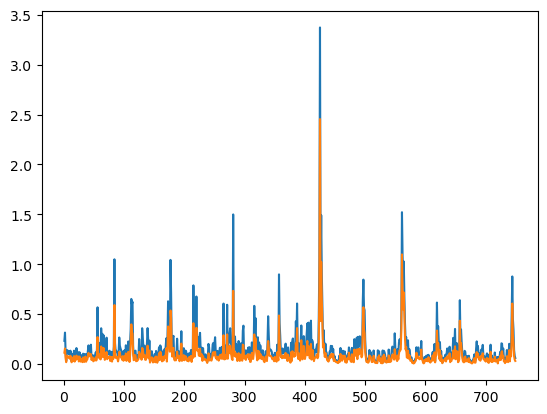

In [100]:
confounds_file='/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-NDARWW005GCU/ses-HBNsiteRU/func/sub-NDARWW005GCU_ses-HBNsiteRU_task-movieDM_desc-confounds_timeseries.tsv'
df = pd.read_csv(confounds_file, sep='\t')
plt.plot(df['framewise_displacement'])
plt.plot(df['rmsd'])

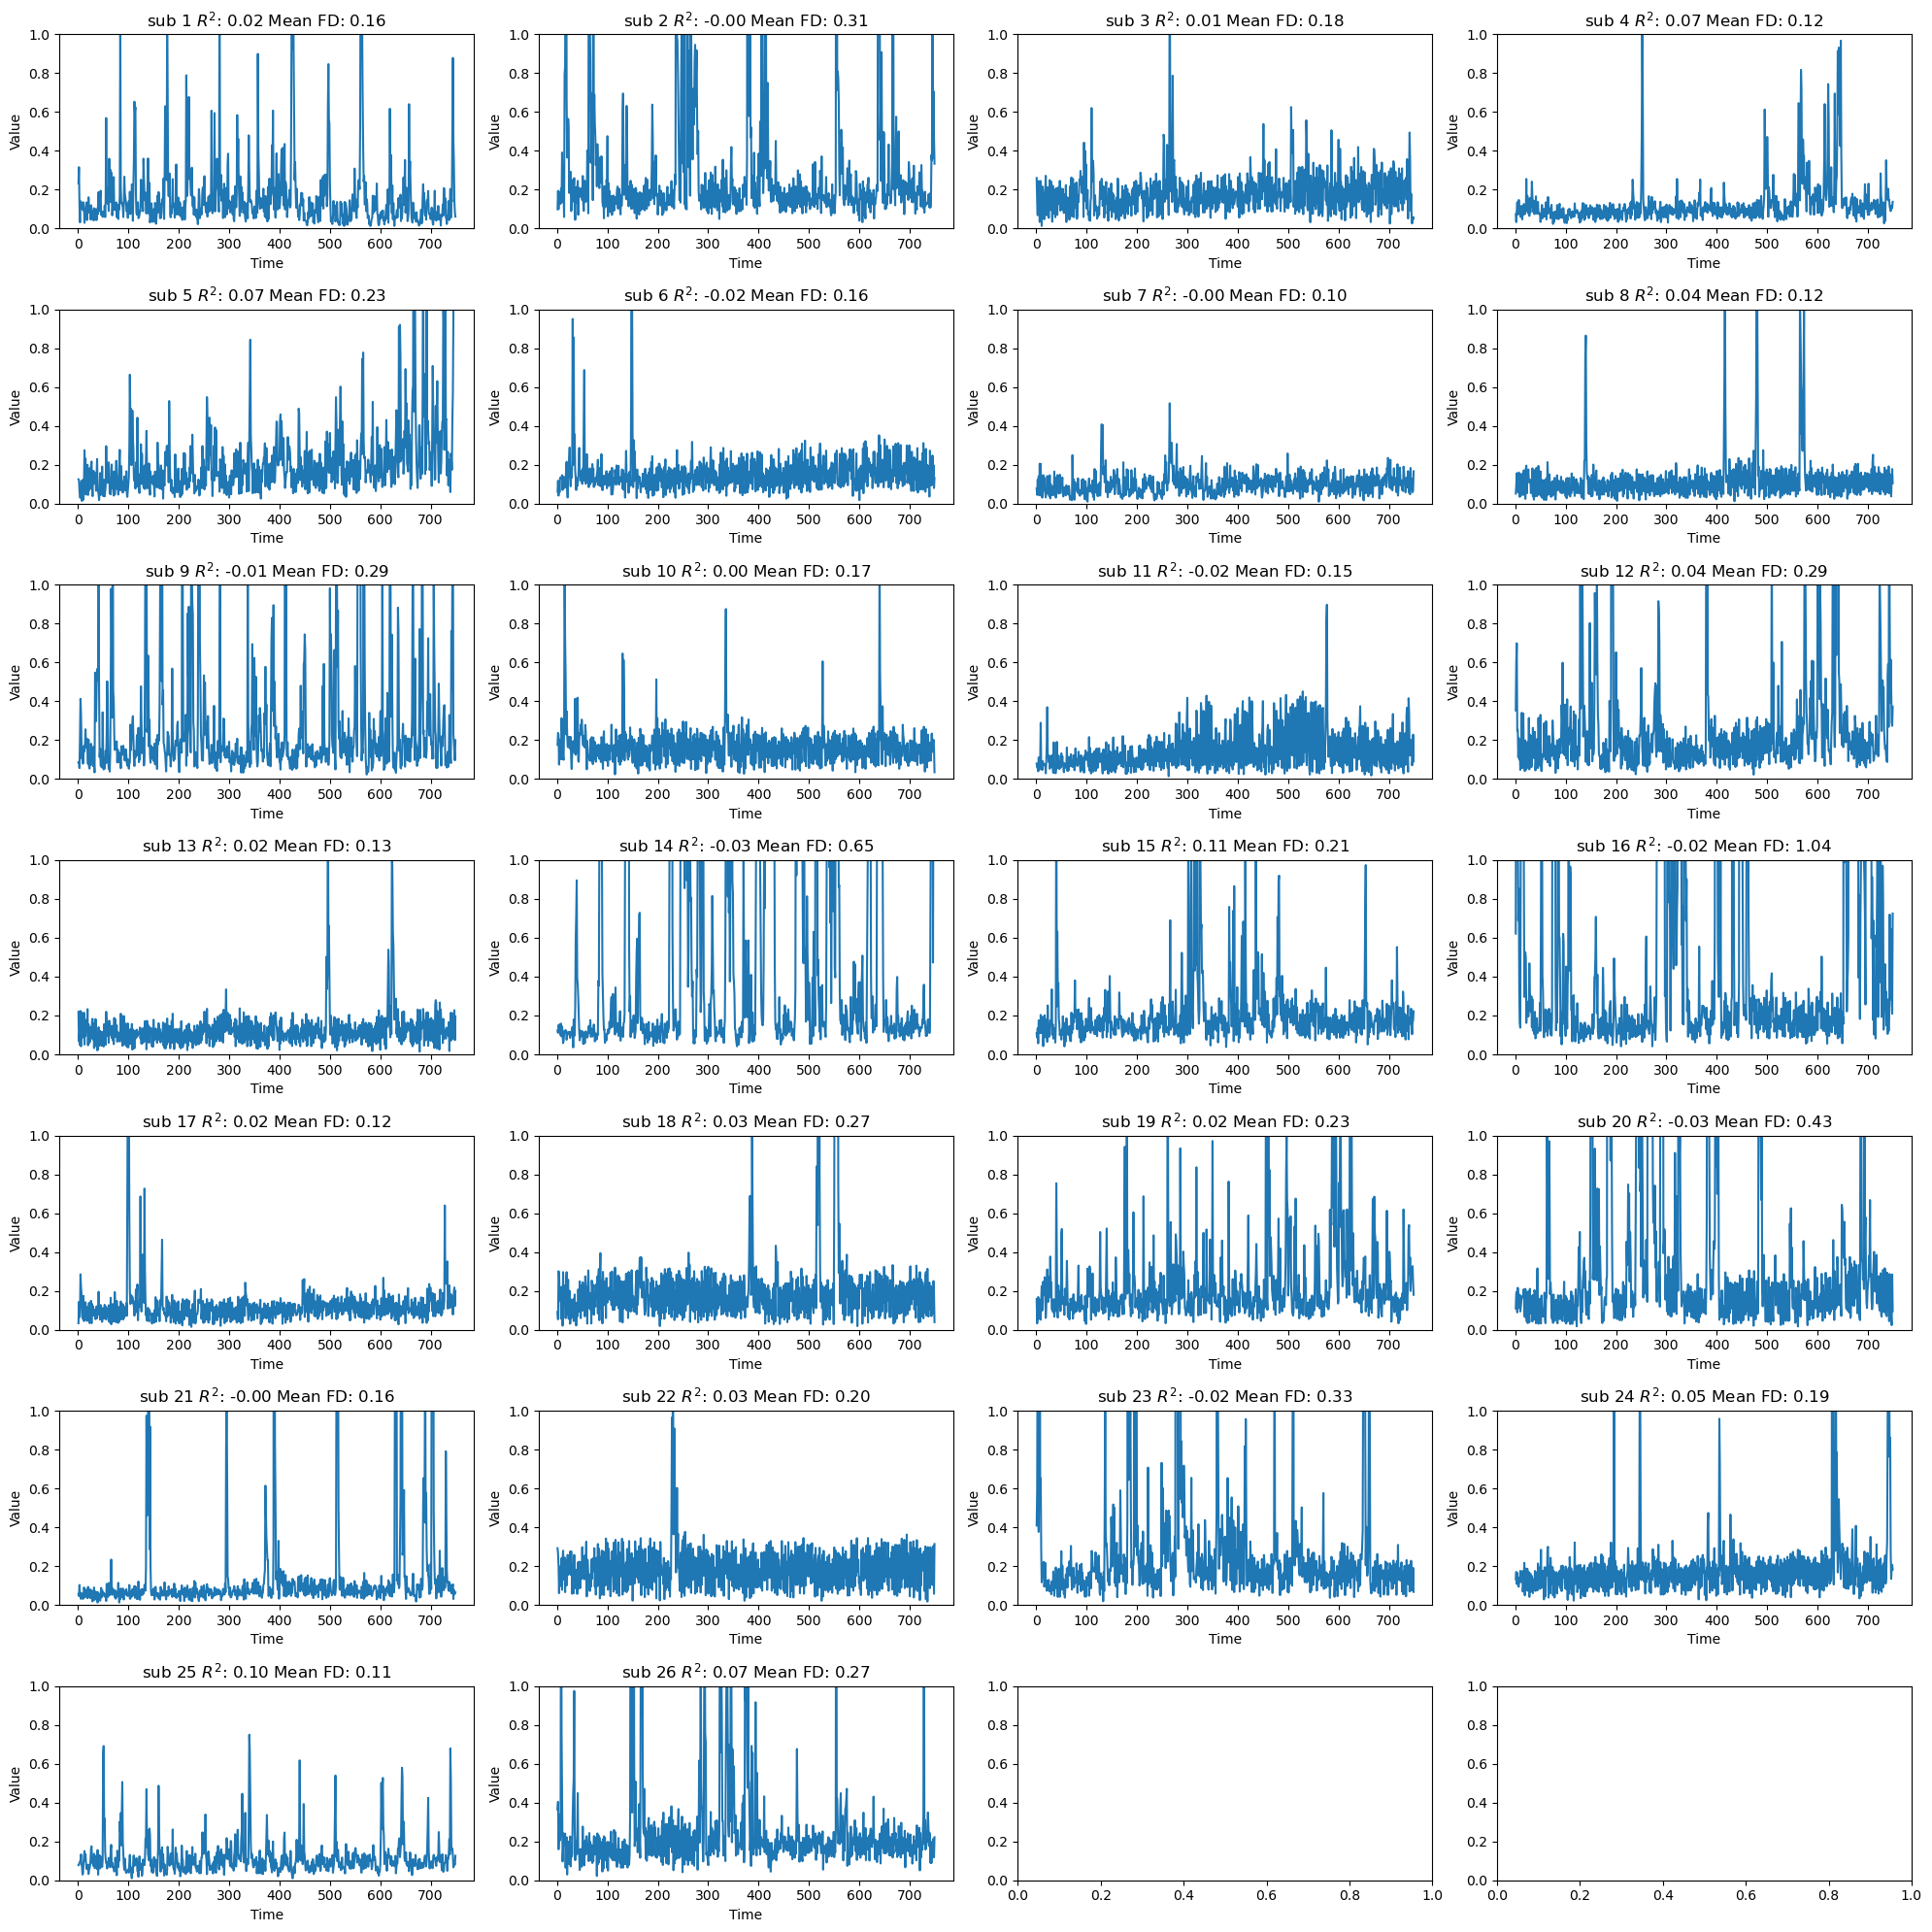

In [101]:
fig, axes = plt.subplots(7, 4, figsize=(20, 20))  # Adjust the number of rows and columns as needed
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Loop through each subject and plot
for i, subject in enumerate(good_subjects_list):
    confounds_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{subject}/ses-HBNsiteRU/func/sub-{subject}_ses-HBNsiteRU_task-movieDM_desc-confounds_timeseries.tsv'
    df = pd.read_csv(confounds_file, sep='\t')
    meanfd=np.mean(df['framewise_displacement'])
    ax = axes[i]
    ax.plot(df['framewise_displacement'])
    #ax.plot(df['rmsd'])
    ax.set_title(f'sub {i+1} $R^2$: {r2_list[i]:.2f} Mean FD: {meanfd:.2f}')
    ax.set_xlabel('Time')  # Replace with your actual x-axis label
    ax.set_ylabel('Value')  # Replace with your actual y-axis label
    ax.set_ylim(0,1)
# # Hide any unused subplots
# for i in range(len(subject_list), len(axes)):
#     fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### plot the subjects ranked by r2

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26]

In [116]:
sub_ind_list=list(range(1,len(r2_list)+1))
zipped_lists = zip(r2_list, good_subjects_list,sub_ind_list)
sorted_zipped_lists = sorted(zipped_lists,reverse=True)

# Unzip the sorted list
sorted_r2_list, sorted_good_subjects_list, sorted_sub_ind_list= zip(*sorted_zipped_lists)

# Convert to lists (optional, since zip returns tuples)
sorted_sub_ind_list = list(sorted_sub_ind_list)
sorted_r2_list = list(sorted_r2_list)
sorted_good_subjects_list = list(sorted_good_subjects_list)


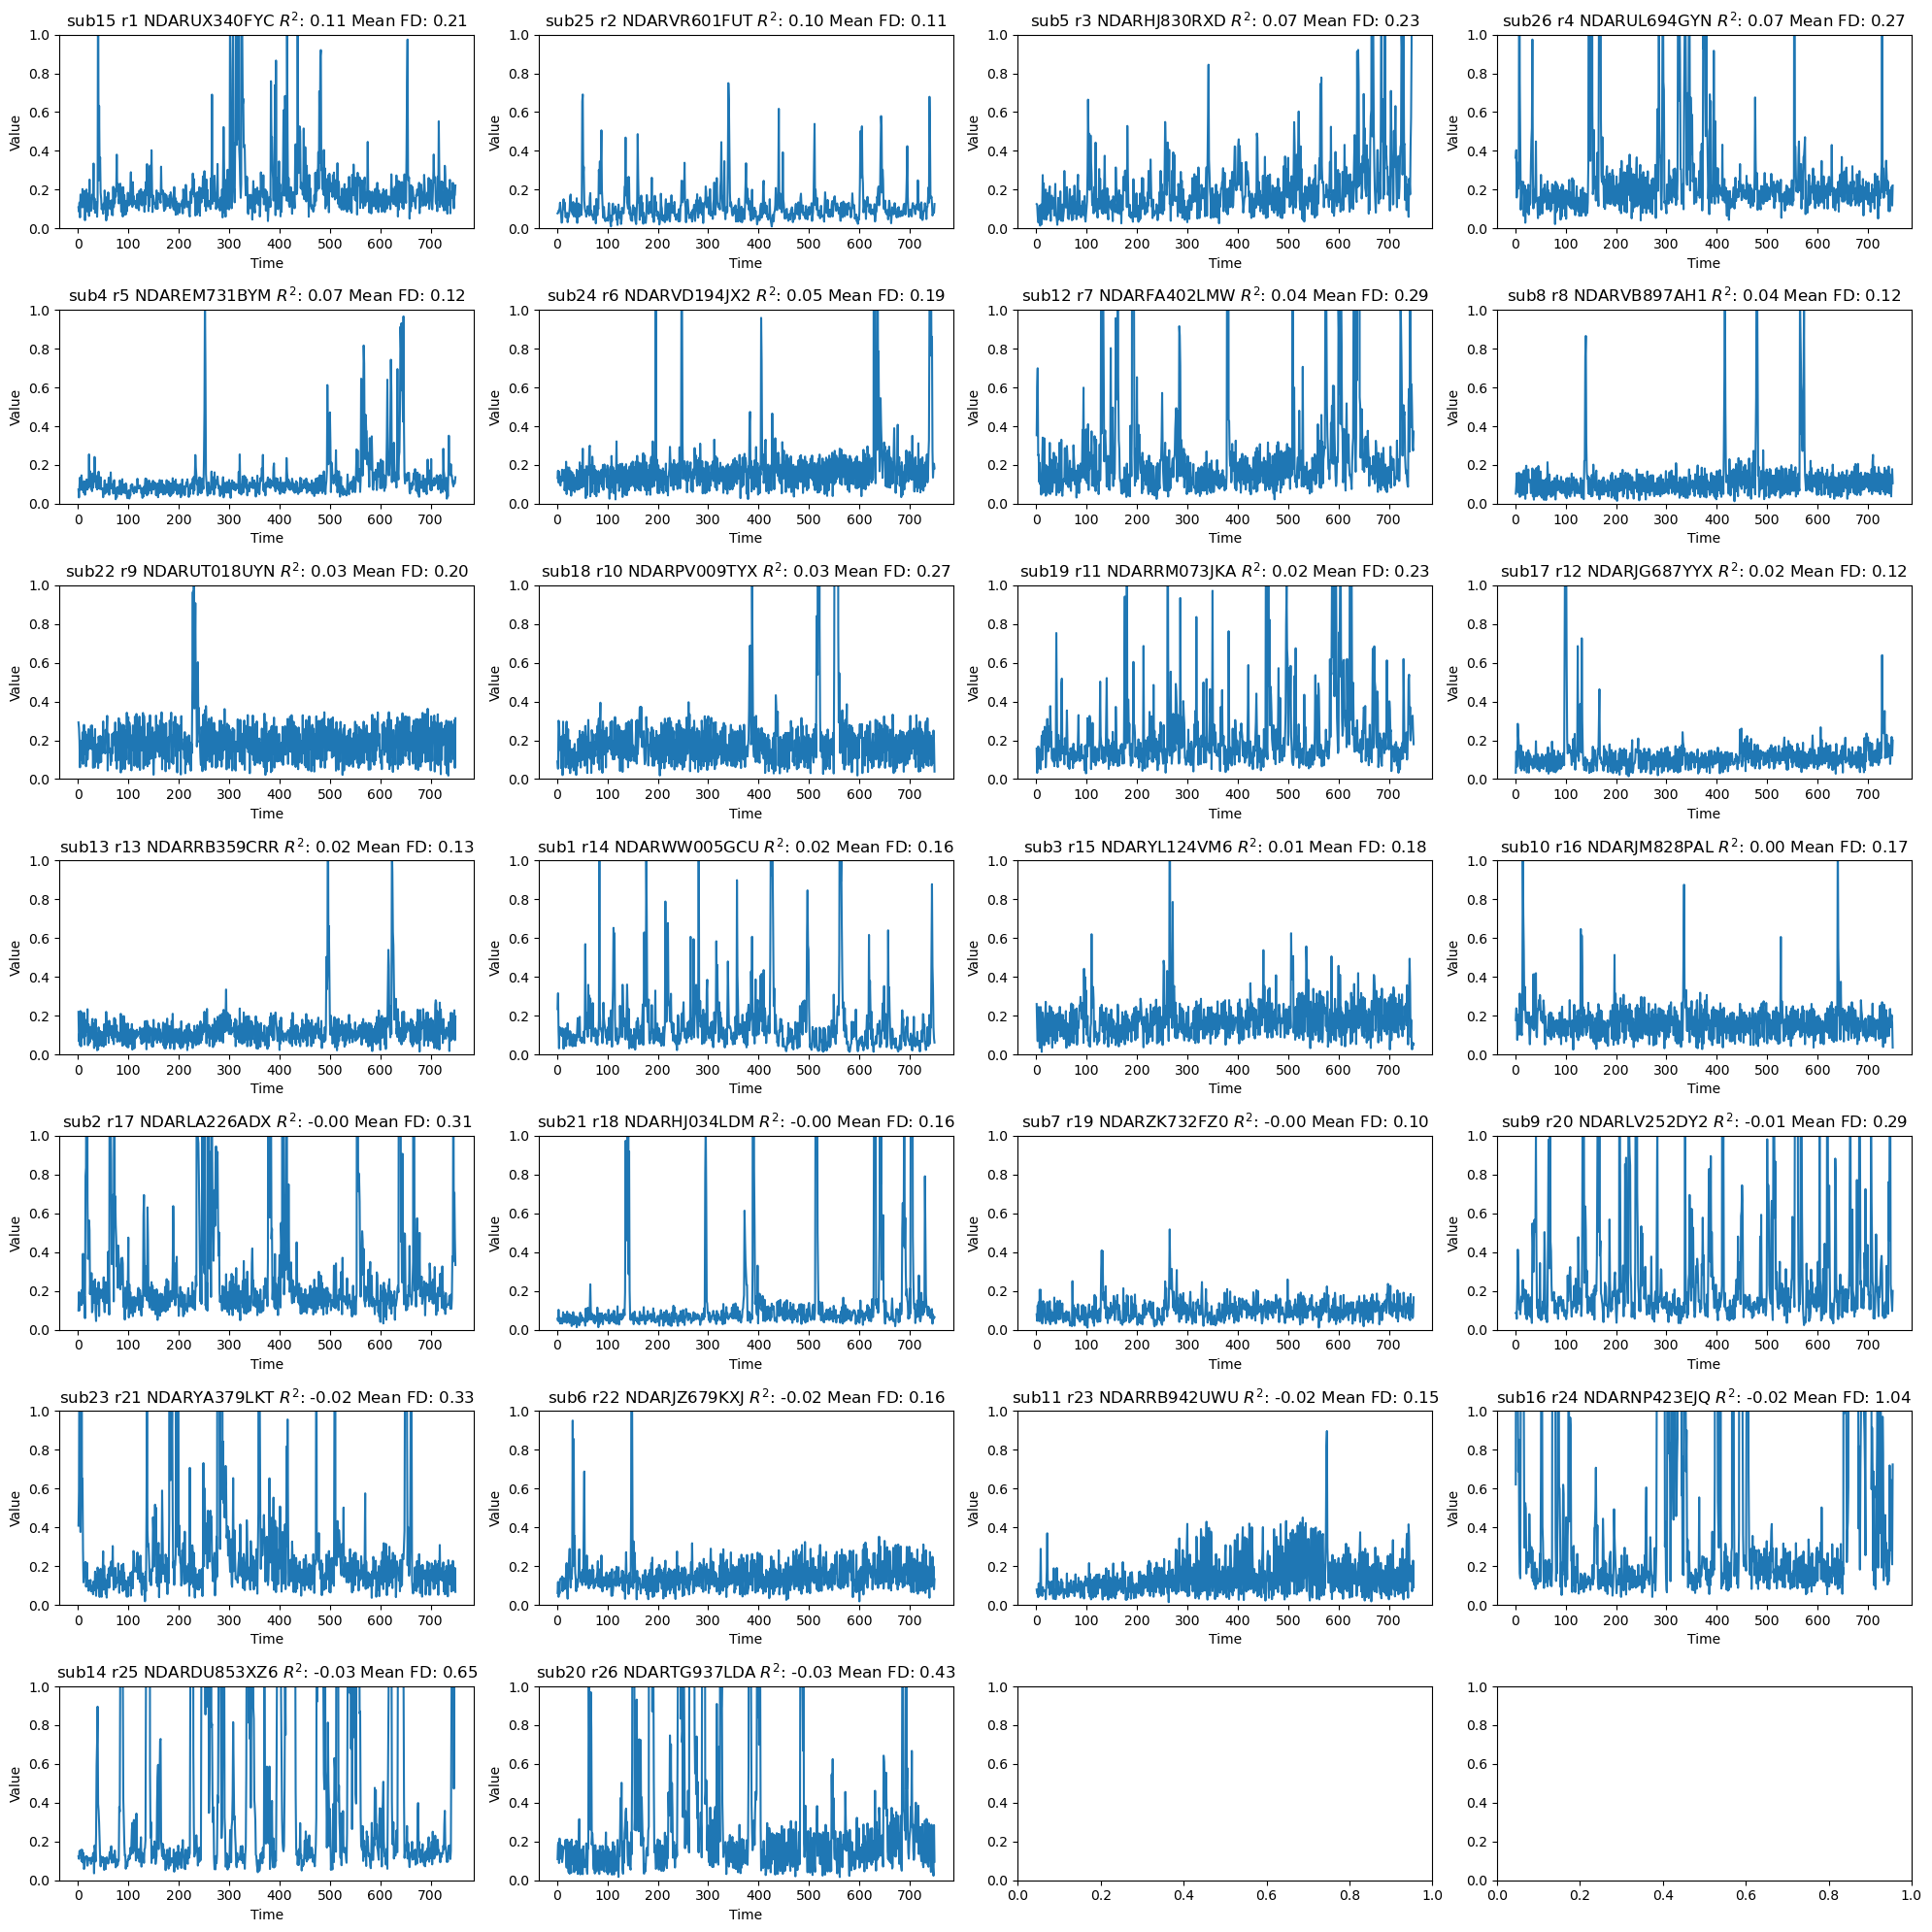

In [118]:
fig, axes = plt.subplots(7, 4, figsize=(20, 20))  # Adjust the number of rows and columns as needed
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Loop through each subject and plot
for i, subject in enumerate(sorted_good_subjects_list):
    confounds_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{subject}/ses-HBNsiteRU/func/sub-{subject}_ses-HBNsiteRU_task-movieDM_desc-confounds_timeseries.tsv'
    df = pd.read_csv(confounds_file, sep='\t')
    meanfd=np.mean(df['framewise_displacement'])
    ax = axes[i]
    ax.plot(df['framewise_displacement'])
    #ax.plot(df['rmsd'])
    ax.set_title(f'sub{sorted_sub_ind_list[i]} r{i+1} {subject} $R^2$: {sorted_r2_list[i]:.2f} Mean FD: {meanfd:.2f}')
    ax.set_xlabel('Time')  # Replace with your actual x-axis label
    ax.set_ylabel('Value')  # Replace with your actual y-axis label
    ax.set_ylim(0,1)
# # Hide any unused subplots
# for i in range(len(subject_list), len(axes)):
#     fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## plot stuff

#### load mriqc stuff

In [12]:
import os
import glob
from pathlib import Path
#from dotenv import load_dotenv
import pandas as pd
import numpy as np
# import dask.dataframe as dd
# import dask.bag as db

import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
nat_img_dir='/nese/mit/group/sig/projects/naturalistic/nat_img/'
all_qc = pd.read_csv(  f"../data/all_qc.csv"  )

In [14]:
def get_imaging_site(identifier):
    path = f'/nese/mit/group/sig/projects/hbn/hbn_bids/sub-{identifier}/'
    if os.path.isdir(path + 'ses-HBNsiteRU'):
        return 'HBNsiteRU'
    elif os.path.isdir(path + 'ses-HBNsiteCBIC'):
        return 'HBNsiteCBIC'
    elif os.path.isdir(path + 'ses-HBNsiteSI'):
        return 'HBNsiteSI'
    elif os.path.isdir(path + 'ses-HBNsiteCUNY'):
        return 'HBNsiteCUNY'
    else:
        return None
        
dx_final=pd.read_csv(f'{nat_img_dir}sourcedata/data/HBN/phenotype/parsed/dx_onehot.csv')
dx_final['imaging_site'] = dx_final['Identifiers'].apply(get_imaging_site)

filtered_df = dx_final[dx_final['Autism Spectrum Disorder'] == 1]
asd_df = filtered_df[['Identifiers','imaging_site']].rename(columns={'Identifiers': 'subj_id'})
asd_df['subj_id'] = 'sub-' + asd_df['subj_id'].astype(str)

filtered_df = dx_final[dx_final['No Diagnosis Given'] == 1]
nt_df = filtered_df[['Identifiers','imaging_site']].rename(columns={'Identifiers': 'subj_id'})
nt_df['subj_id'] = 'sub-' + nt_df['subj_id'].astype(str)

filtered_df = dx_final[(dx_final['No Diagnosis Given'] == 0) & (dx_final['Autism Spectrum Disorder'] == 0)]
pilot_df = filtered_df[['Identifiers','imaging_site']].rename(columns={'Identifiers': 'subj_id'})
pilot_df['subj_id'] = 'sub-' + pilot_df['subj_id'].astype(str)

In [15]:
dx_final

,Identifiers,Age,Sex,Site,ADHD-Combined Type,ADHD-Hyperactive/Impulsive Type,ADHD-Inattentive Type,Acute Stress Disorder,Adjustment Disorders,Agoraphobia,...,Unspecified Anxiety Disorder,Unspecified Attention-Deficit/Hyperactivity Disorder,Unspecified Bipolar and Related Disorder,Unspecified Depressive Disorder,Unspecified Feeding or Eating Disorder,Unspecified Intellectual Disability,Unspecified Neurodevelopmental Disorder,Unspecified Tic Disorder,Unspecified Trauma- and Stressor-Related Disorder,imaging_site
0,NDARAA075AMK,6.728040,female,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HBNsiteSI
1,NDARAA112DMH,5.545744,male,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HBNsiteRU
2,NDARAA117NEJ,7.475929,male,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HBNsiteRU
3,NDARAA306NT2,21.216746,female,3,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HBNsiteRU
4,NDARAA358BPN,11.853296,male,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4762,NDARZT957CWG,16.034565,male,3,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HBNsiteCBIC
4763,NDARZU401RCU,17.663586,female,3,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HBNsiteCBIC
4764,NDARZV458LDP,15.763175,female,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HBNsiteCUNY
4765,NDARZX745YLZ,16.288501,male,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None


In [23]:
'''
I want a dataframe which has:

from all_qc
- only the relaxed filtered subjects
- only task==DM

from dx_final:
- a 'case' column where ASD (1) and controls (0), others (-1)
- only ses==RU
'''
pd.options.mode.chained_assignment = None

dx_final_ru = dx_final[dx_final['imaging_site'] == 'HBNsiteRU']

def assign_class(row):
    if row['Autism Spectrum Disorder'] == 1:
        return 1
    elif row['No Diagnosis Given'] == 1:
        return 0
    else:
        return -1

dx_final_ru['class'] = dx_final_ru.apply(assign_class, axis=1)

all_qc_ru_dm = all_qc[all_qc['ses'] == 'HBNsiteRU']
all_qc_ru_dm = all_qc_ru_dm[all_qc_ru_dm['task'] == 'movieDM']
all_qc_ru_dm = all_qc_ru_dm[all_qc_ru_dm['relaxed_fd50'] == 1]

#get the common subjects between these dataframes
dx_final_ru = dx_final_ru[dx_final_ru['Identifiers'].isin(all_qc_ru_dm['sub'])]


In [24]:
all_qc_ru_dm.columns

Index(['aor', 'aqi', 'bids_meta', 'dummy_trs', 'dvars_nstd', 'dvars_std',
       'dvars_vstd', 'efc', 'fber', 'fd_mean', 'fd_num', 'fd_perc', 'fwhm_avg',
       'fwhm_x', 'fwhm_y', 'fwhm_z', 'gcor', 'gsr_x', 'gsr_y', 'provenance',
       'size_t', 'size_x', 'size_y', 'size_z', 'snr', 'spacing_tr',
       'spacing_x', 'spacing_y', 'spacing_z', 'summary_bg_k', 'summary_bg_mad',
       'summary_bg_mean', 'summary_bg_median', 'summary_bg_n',
       'summary_bg_p05', 'summary_bg_p95', 'summary_bg_stdv', 'summary_fg_k',
       'summary_fg_mad', 'summary_fg_mean', 'summary_fg_median',
       'summary_fg_n', 'summary_fg_p05', 'summary_fg_p95', 'summary_fg_stdv',
       'tsnr', 'subj_id', 'run_bad', 'ses', 'sub', 'task', 'relaxed_fd50',
       'dorit_fd40'],
      dtype='object')

In [25]:
#for sub in subjects list
with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
sub_list = [line.strip() for line in sub_list]

#get the r2 mean value for each subject
#get the motion and demographics for each subject

#make a plot where each subject has bars for these values

In [26]:
all_qc_ru_dm.loc[all_qc['sub'] == sub, 'fd_perc'].values

array([], dtype=float64)

In [27]:
#stackedr2_list=[]
#mean_stackedr2_list=[]
mriqc_fd_mean_list=[]
mriqc_fd_num_list=[]
mriqc_fd_perc_list=[]
mriqc_tsnr_list=[]
for sub in sub_list:
#sub=sub_list[0]
    # loaded=np.load(f'../pilot_results/feat-audio_sub-{sub}_ROI-all_PCA-1_delay-6.npz')
    # stackedr2_list.append(loaded['stacked_r2s'])
    # mean_stackedr2_list.append(loaded['stacked_r2s'].mean())
    mriqc_fd_mean_list.append(all_qc_ru_dm.loc[all_qc['sub'] == sub, 'fd_mean'].values[0])
    mriqc_fd_num_list.append(all_qc_ru_dm.loc[all_qc['sub'] == sub, 'fd_num'].values[0])
    mriqc_fd_perc_list.append(all_qc_ru_dm.loc[all_qc['sub'] == sub, 'fd_perc'].values[0])
    mriqc_tsnr_list.append(all_qc_ru_dm.loc[all_qc['sub'] == sub, 'tsnr'].values[0])

In [28]:
with open('../outputs/noise_ceiling/pilots_a4a5_ns_mean_100.txt', 'r') as file:
    sub_list = file.readlines()
noise_ceiling = [line.strip() for line in sub_list]

In [29]:
mean_fd=[]
max_fd=[]
mean_rmsd=[]
for i, subject in enumerate(good_subjects_list):
    confounds_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{subject}/ses-HBNsiteRU/func/sub-{subject}_ses-HBNsiteRU_task-movieDM_desc-confounds_timeseries.tsv'
    df = pd.read_csv(confounds_file, sep='\t')
    mean_fd.append(np.mean(df['framewise_displacement']))
    max_fd.append(np.max(df['framewise_displacement']))
    mean_rmsd.append(np.mean(df['rmsd']))

In [30]:
df['framewise_displacement']

0           NaN
1      0.364626
2      0.404048
3      0.159507
4      0.227584
         ...   
745    0.126666
746    0.169506
747    0.214425
748    0.117970
749    0.221496
Name: framewise_displacement, Length: 750, dtype: float64

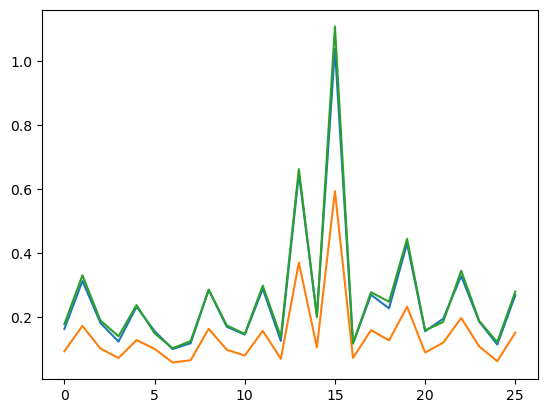

In [31]:
plt.plot(mean_fd)
plt.plot(mean_rmsd)
plt.plot(mriqc_fd_mean_list)

In [32]:

# Combine the lists using zip
combined = list(zip(r2_list, noise_ceiling, mriqc_fd_mean_list, mean_fd))

# Sort the combined list
sorted_combined = sorted(combined, key=lambda x: x[0])

# Unzip the sorted combined list back into separate lists
r2_list_sorted, noise_ceiling_sorted, mriqc_fd_mean_list_sorted, mean_fd_sorted = zip(*sorted_combined)

# Convert tuples back to lists if needed
r2_list_sorted = list(r2_list_sorted)
noise_ceiling_sorted = list(noise_ceiling_sorted)
mriqc_fd_mean_list_sorted = list(mriqc_fd_mean_list_sorted)
mean_fd_sorted = list(mean_fd_sorted)

noise_ceiling_sorted = [float(f) for f in noise_ceiling_sorted]


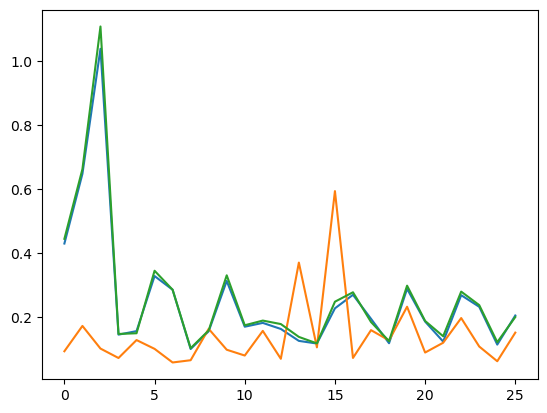

In [33]:
plt.plot(mean_fd_sorted)
plt.plot(mean_rmsd)
plt.plot(mriqc_fd_mean_list_sorted)

In [34]:
import scipy.stats


In [35]:
noise_ceiling_r, _ = scipy.stats.pearsonr(r2_list_sorted, noise_ceiling_sorted)
mriqc_fd_mean_list_r, _ = scipy.stats.pearsonr(r2_list_sorted, mriqc_fd_mean_list_sorted)
mean_fd_r, _ = scipy.stats.pearsonr(r2_list_sorted, mean_fd_sorted)


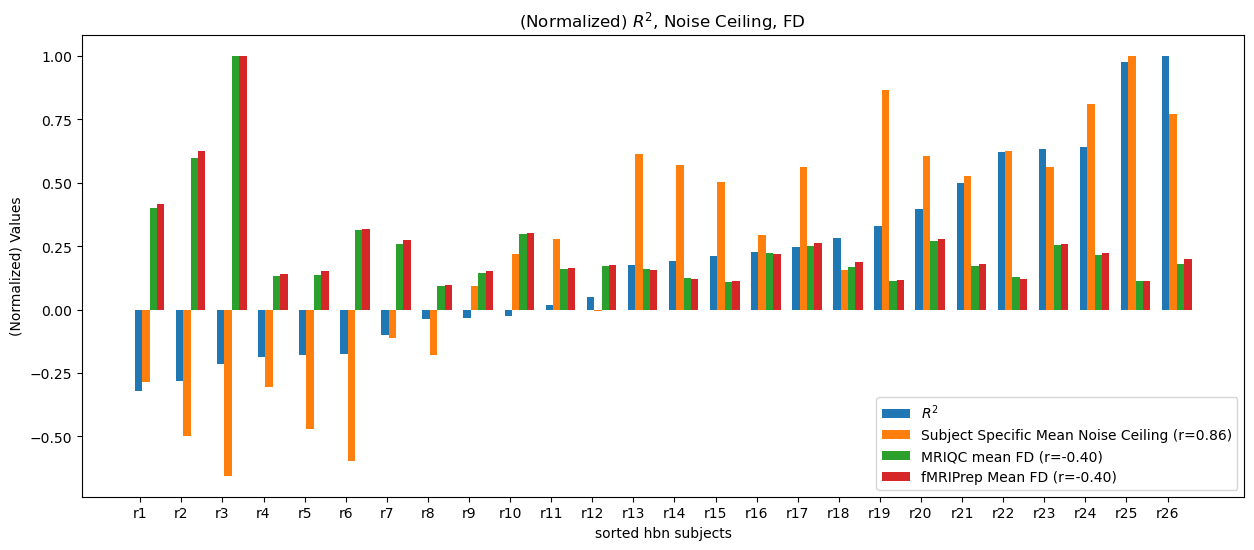

In [36]:
# Number of groups
N = len(r2_list_sorted)

# List of all lists
data = [[f/max(r2_list_sorted) for f in r2_list_sorted], [f/max(noise_ceiling_sorted) for f in noise_ceiling_sorted], [f/max(mriqc_fd_mean_list_sorted) for f in mriqc_fd_mean_list_sorted], [f/max(mean_fd_sorted) for f in mean_fd_sorted]]

# Number of bars in each group
num_bars = len(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Set the positions of the groups and width of the bars
ind = np.arange(N)
width = 0.18
labels=['$R^2$',f'Subject Specific Mean Noise Ceiling (r={noise_ceiling_r:.02f})',f'MRIQC mean FD (r={mriqc_fd_mean_list_r:.02f})', f'fMRIPrep Mean FD (r={mean_fd_r:.02f})']
# Create bars for each list
for i, lst in enumerate(data):
    ax.bar(ind + i*width, lst, width, label=f'{labels[i]}')

# Add labels, title, and legend
ax.set_xlabel('sorted hbn subjects')
ax.set_ylabel('(Normalized) Values')
ax.set_title('(Normalized) $R^2$, Noise Ceiling, FD ')
ax.set_xticks(ind + width / num_bars)
ax.set_xticklabels([f'r{i+1}' for i in range(N)])
ax.legend()

# Show the plot
plt.show()

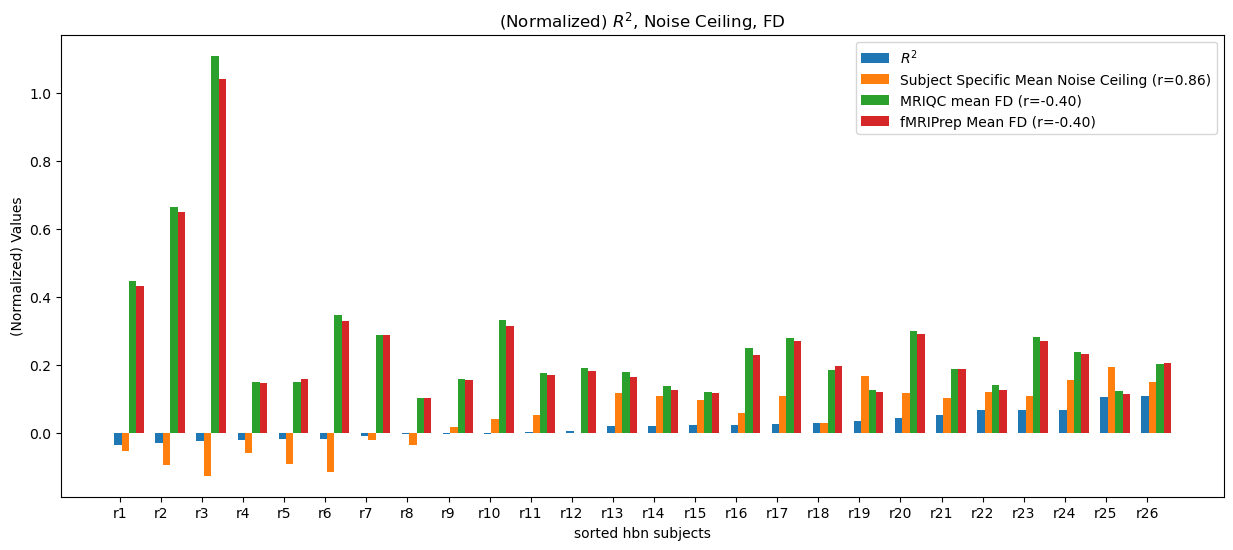

In [37]:
# Number of groups
N = len(r2_list_sorted)

# List of all lists
#data = [[f/max(r2_list_sorted) for f in r2_list_sorted], [f/max(noise_ceiling_sorted) for f in noise_ceiling_sorted], [f/max(mriqc_fd_mean_list_sorted) for f in mriqc_fd_mean_list_sorted], [f/max(mean_fd_sorted) for f in mean_fd_sorted]]
data = [r2_list_sorted, noise_ceiling_sorted, mriqc_fd_mean_list_sorted, mean_fd_sorted]

# Number of bars in each group
num_bars = len(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Set the positions of the groups and width of the bars
ind = np.arange(N)
width = 0.18
labels=['$R^2$',f'Subject Specific Mean Noise Ceiling (r={noise_ceiling_r:.02f})',f'MRIQC mean FD (r={mriqc_fd_mean_list_r:.02f})', f'fMRIPrep Mean FD (r={mean_fd_r:.02f})']
# Create bars for each list
for i, lst in enumerate(data):
    ax.bar(ind + i*width, lst, width, label=f'{labels[i]}')

# Add labels, title, and legend
ax.set_xlabel('sorted hbn subjects')
ax.set_ylabel('(Normalized) Values')
ax.set_title('(Normalized) $R^2$, Noise Ceiling, FD ')
ax.set_xticks(ind + width / num_bars)
ax.set_xticklabels([f'r{i+1}' for i in range(N)])
ax.legend()

# Show the plot
plt.show()

### make an sns pairplot

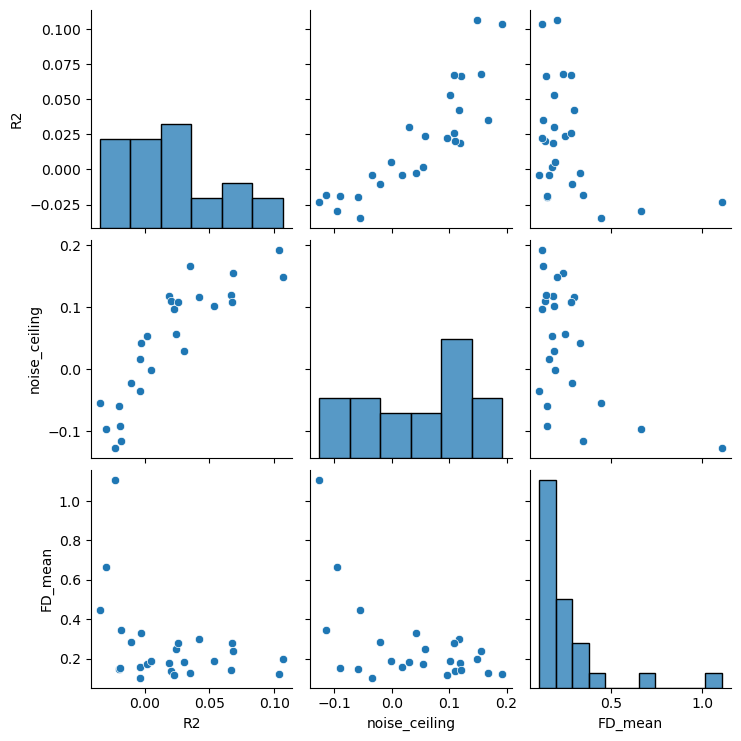

In [94]:
import pandas as pd

# Create a dictionary with the lists
data = {
    'R2': r2_list_sorted,
    'noise_ceiling': noise_ceiling_sorted,
    'FD_mean': mriqc_fd_mean_list_sorted
}

# Create the DataFrame
df = pd.DataFrame(data)

sns.pairplot(df)

### look at different FD thresholds

In [82]:
np.mean([value for value in r2_list if value > 0.04])

0.07268824868449959

In [ ]:
import random

fd_thresh_list=[]
count_list=[]
for fd_thresh in [2.0,1.0,0.5,0.4,0.3,0.25,0.2,0.15]:
    print(f'thresh: {fd_thresh}')
    count = len([value for value in mriqc_fd_mean_list_sorted if value < fd_thresh])
    count_list.append(count)
    print(count)
    # Step 1: Identify indices where values in mriqc_fd_mean_list_sorted are less than x
    indices = [i for i, value in enumerate(mriqc_fd_mean_list_sorted) if value < fd_thresh]
    
    # Step 2: Extract corresponding values from r2_list_sorted
    subset_r2 = [r2_list_sorted[i] for i in indices]
    
    # Step 3: Randomly select values from this subset
    # Specify the number of random selections you want to make
    perms_list=[]
    for perms in np.arange(25):
        num_selections = 5
        random_selection = random.sample(subset_r2, min(num_selections, len(subset_r2)))
        #print(random_selection)
        # Step 4: Calculate the mean of the randomly selected values
        mean_value = np.mean(random_selection) if random_selection else None
        print(mean_value)
        perms_list.append(mean_value)
    fd_thresh_list.append(perms_list)

/tmp/ipykernel_1576877/1766189303.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['$R^2$','$R^2$ w/v1','train $R^2$','train $R^2$ w/v1'])
/tmp/ipykernel_1576877/1766189303.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'FD<{thresh}\n n={count_list[i]}' for i,thresh in enumerate([2.0,1.0,0.5,0.4,0.3,0.25,0.2,0.15])])


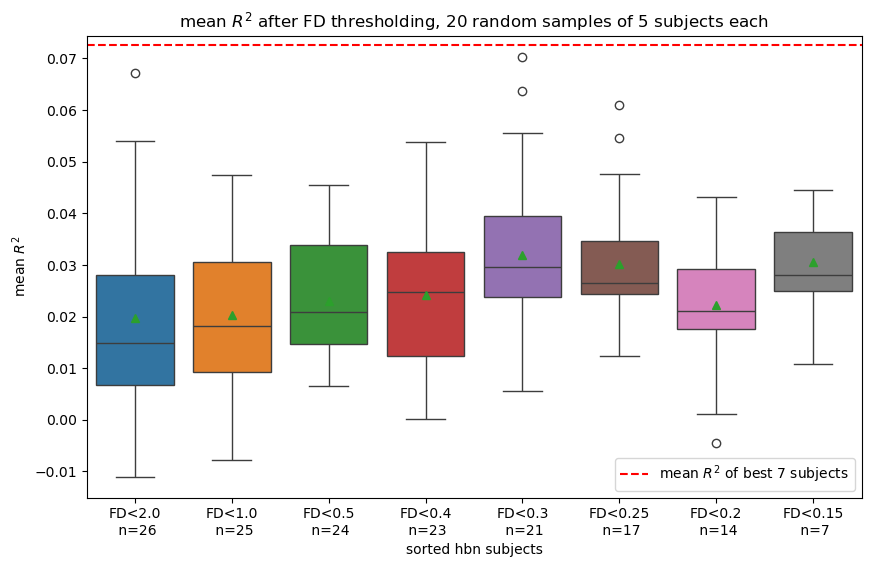

In [91]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(fd_thresh_list,showmeans=True)
ax.set_xticklabels(['$R^2$','$R^2$ w/v1','train $R^2$','train $R^2$ w/v1'])
ax.set_xlabel('sorted hbn subjects')
ax.set_ylabel('mean $R^2$')
ax.set_title('mean $R^2$ after FD thresholding, 20 random samples of 5 subjects each')
#ax.set_xticks(ind + width / num_bars)
ax.set_xticklabels([f'FD<{thresh}\n n={count_list[i]}' for i,thresh in enumerate([2.0,1.0,0.5,0.4,0.3,0.25,0.2,0.15])])

plt.axhline(y=np.mean([value for value in r2_list if value > 0.04]), color='r', linestyle='--',label='mean $R^2$ of best 7 subjects')
plt.legend()